### Author Hayden Gonne 
# Edit at june 10, 2024


# 데이터 증강

In [1]:
pip install tensorflow-datasets


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import random
import numpy as np
import os
import cv2
from PIL import Image

# 다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = 30

# 원본 폴더 경로
file_path = r"C:\Users\admin\Desktop\face_recognition_project\dataset\train\Hayden"
# 위의 폴더 내부에 있는 이미지 이름의 배열이 저장
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names) # file_names의 길이 저장
augment_cnt = 1 # 몇번의 augmentation이 일어났는지를 확인하기 위해 선언

for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num) # 전체 이미지 개수 중 하나를 랜덤하게 선택하여 file_name에 그 인덱스를 갖는 이미지 이름을 저장
    file_name = file_names[change_picture_index]
    
    origin_image_path = os.path.join(file_path, file_name)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1, 4) # 1~3의 무작위 수가 결정
    
    if random_augment == 1:
        # 이미지 좌우 반전
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(os.path.join(file_path, f'inverted_{augment_cnt}.png'))
        
    elif random_augment == 2:
        # -20~20도로 이미지 기울이기
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(os.path.join(file_path, f'rotated_{augment_cnt}.png'))
        
    elif random_augment == 3:
        # 가우스 노이즈 추가하기
        img = cv2.imread(origin_image_path)
        row, col, ch = img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        gauss = gauss.reshape(row, col, ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(os.path.join(file_path, f'noiseAdded_{augment_cnt}.png'))
        
    augment_cnt += 1 # 한바퀴 돌 때마다 1씩 업데이트


In [5]:
# 그레이 스케일 조정, 명암 조절, 히스토그램 조절, convert, 엣지 컬러 캐니 등 추가 - 엣지 컬러 캐니 제거 
# second made by Hayden Gonne

import random
import numpy as np
import os
import cv2
from PIL import Image, ImageEnhance, ImageOps

# 새로 만들 이미지 갯수 설정
num_augmented_images = 30

# 원본 폴더 경로
file_path = r"C:\Users\admin\Desktop\face_recognition_project\dataset\train\Jaehyung"
# 이미지 파일 이름 배열
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num)
    file_name = file_names[change_picture_index]
    
    origin_image_path = os.path.join(file_path, file_name)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1, 9)  # 1~8의 무작위 수 결정
    
    if random_augment == 1:
        # 이미지 좌우 반전
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(os.path.join(file_path, f'inverted_{augment_cnt}.png'))
        
    elif random_augment == 2:
        # -20~20도로 이미지 기울이기
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(os.path.join(file_path, f'rotated_{augment_cnt}.png'))
        
    elif random_augment == 3:
        # 가우스 노이즈 추가하기
        img = cv2.imread(origin_image_path)
        row, col, ch = img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(os.path.join(file_path, f'noiseAdded_{augment_cnt}.png'))
        
    elif random_augment == 4:
        # 그레이스케일 변환
        grayscale_image = ImageOps.grayscale(image)
        grayscale_image.save(os.path.join(file_path, f'grayscale_{augment_cnt}.png'))
        
    elif random_augment == 5:
        # 명암 조절
        enhancer = ImageEnhance.Contrast(image)
        contrasted_image = enhancer.enhance(random.uniform(0.5, 1.5))
        contrasted_image.save(os.path.join(file_path, f'contrasted_{augment_cnt}.png'))
        
    elif random_augment == 6:
        # 히스토그램 평활화
        img = cv2.imread(origin_image_path)
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        hist_equalized_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        hist_equalized_image = Image.fromarray(hist_equalized_image)
        hist_equalized_image.save(os.path.join(file_path, f'hist_equalized_{augment_cnt}.png'))
        
    elif random_augment == 7:
        # 색상 변환
        converted_image = image.convert('L').convert('RGB')
        converted_image.save(os.path.join(file_path, f'converted_{augment_cnt}.png'))
        
    elif random_augment == 8:
        # 엣지 검출 후 컬러
        img = cv2.imread(origin_image_path)
        edges = cv2.Canny(img, 100, 200)
        edges_colored = cv2.bitwise_and(img, img, mask=edges)
        edges_colored_image = Image.fromarray(edges_colored)
        edges_colored_image.save(os.path.join(file_path, f'edges_colored_{augment_cnt}.png'))
        
    augment_cnt += 1  # 한 바퀴 돌 때마다 1씩 업데이트


In [7]:
# 인풋 데이터 넣으면 전처리→ 증강 → 생성된 이미지들로 train, test가 자동으로 분류되어 각 폴더에 저장되는 파이프 라인
# second made by Hayden Gonne

import random
import numpy as np
import os
import cv2
from PIL import Image, ImageEnhance, ImageOps
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전처리 레이어 설정
IMG_SIZE = 180

preprocess_layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

# 증강 이미지 수 설정
num_augmented_images = 70

# 원본 폴더 경로 설정
file_path = r"C:\Users\admin\Desktop\face_recognition_project\dataset\June"
output_path = r"C:\Users\admin\Desktop\face_recognition_project\dataset"

# 이미지 파일 배열
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

# 데이터 증강 함수
def augment_images(file_path, output_path, num_augmented_images):
    file_names = os.listdir(file_path)
    total_origin_image_num = len(file_names)
    augment_cnt = 1

    for i in range(1, num_augmented_images):
        change_picture_index = random.randrange(1, total_origin_image_num)
        file_name = file_names[change_picture_index]
        
        origin_image_path = os.path.join(file_path, file_name)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1, 9)
        
        if random_augment == 1:
            # 이미지 좌우 반전
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(os.path.join(file_path, f'inverted_{augment_cnt}.png'))
            
        elif random_augment == 2:
            # -20~20도로 이미지 기울이기
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(os.path.join(file_path, f'rotated_{augment_cnt}.png'))
            
        elif random_augment == 3:
            # 가우스 노이즈 추가하기
            img = cv2.imread(origin_image_path)
            row, col, ch = img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean, sigma, (row, col, ch))
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(os.path.join(file_path, f'noiseAdded_{augment_cnt}.png'))
            
        elif random_augment == 4:
            # 그레이스케일 변환
            grayscale_image = ImageOps.grayscale(image)
            grayscale_image.save(os.path.join(file_path, f'grayscale_{augment_cnt}.png'))
            
        elif random_augment == 5:
            # 명암 조절
            enhancer = ImageEnhance.Contrast(image)
            contrasted_image = enhancer.enhance(random.uniform(0.5, 1.5))
            contrasted_image.save(os.path.join(file_path, f'contrasted_{augment_cnt}.png'))
            
        elif random_augment == 6:
            # 히스토그램 평활화
            img = cv2.imread(origin_image_path)
            img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            hist_equalized_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
            hist_equalized_image = Image.fromarray(hist_equalized_image)
            hist_equalized_image.save(os.path.join(file_path, f'hist_equalized_{augment_cnt}.png'))
            
        elif random_augment == 7:
            # 색상 변환
            converted_image = image.convert('L').convert('RGB')
            converted_image.save(os.path.join(file_path, f'converted_{augment_cnt}.png'))
            
        augment_cnt += 1  # 한 바퀴 돌 때마다 1씩 업데이트

# 전처리 및 증강 실행
augment_images(file_path, output_path, num_augmented_images)

# 이미지 파일 경로 목록 생성
all_files = [os.path.join(file_path, f) for f in os.listdir(file_path) if f.endswith(('jpg', 'png'))]

# 학습 및 테스트 세트로 분할
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# 폴더 생성
train_dir = os.path.join(output_path, 'June_train')
test_dir = os.path.join(output_path, 'June_test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 파일 복사
for file in train_files:
    shutil.copy(file, train_dir)
for file in test_files:
    shutil.copy(file, test_dir)

print(f'Train images: {len(train_files)}, Test images: {len(test_files)}')


Train images: 51, Test images: 13


In [9]:
# 인풋 데이터 넣으면 전처리→ 증강 → 생성된 이미지들로 train, test가 자동으로 분류되어 각 폴더에 저장되는 파이프 라인
# second made by Hayden Gonne

import random
import numpy as np
import os
import cv2
from PIL import Image, ImageEnhance, ImageOps
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전처리 레이어 설정
IMG_SIZE = 180

preprocess_layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

# 증강 이미지 수 설정
num_augmented_images = 70

# 원본 폴더 경로 설정
file_path = r"C:\Users\admin\Desktop\face_recognition_project\dataset\Youngrok"
output_path = r"C:\Users\admin\Desktop\face_recognition_project\dataset"

# 이미지 파일 배열
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

# 데이터 증강 함수
def augment_images(file_path, output_path, num_augmented_images):
    file_names = os.listdir(file_path)
    total_origin_image_num = len(file_names)
    augment_cnt = 1

    for i in range(1, num_augmented_images):
        change_picture_index = random.randrange(1, total_origin_image_num)
        file_name = file_names[change_picture_index]
        
        origin_image_path = os.path.join(file_path, file_name)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1, 9)
        
        if random_augment == 1:
            # 이미지 좌우 반전
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(os.path.join(file_path, f'inverted_{augment_cnt}.png'))
            
        elif random_augment == 2:
            # -20~20도로 이미지 기울이기
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(os.path.join(file_path, f'rotated_{augment_cnt}.png'))
            
        elif random_augment == 3:
            # 가우스 노이즈 추가하기
            img = cv2.imread(origin_image_path)
            row, col, ch = img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean, sigma, (row, col, ch))
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(os.path.join(file_path, f'noiseAdded_{augment_cnt}.png'))
            
        elif random_augment == 4:
            # 그레이스케일 변환
            grayscale_image = ImageOps.grayscale(image)
            grayscale_image.save(os.path.join(file_path, f'grayscale_{augment_cnt}.png'))
            
        elif random_augment == 5:
            # 명암 조절
            enhancer = ImageEnhance.Contrast(image)
            contrasted_image = enhancer.enhance(random.uniform(0.5, 1.5))
            contrasted_image.save(os.path.join(file_path, f'contrasted_{augment_cnt}.png'))
            
        elif random_augment == 6:
            # 히스토그램 평활화
            img = cv2.imread(origin_image_path)
            img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            hist_equalized_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
            hist_equalized_image = Image.fromarray(hist_equalized_image)
            hist_equalized_image.save(os.path.join(file_path, f'hist_equalized_{augment_cnt}.png'))
            
        elif random_augment == 7:
            # 색상 변환
            converted_image = image.convert('L').convert('RGB')
            converted_image.save(os.path.join(file_path, f'converted_{augment_cnt}.png'))
            
        augment_cnt += 1  # 한 바퀴 돌 때마다 1씩 업데이트

# 전처리 및 증강 실행
augment_images(file_path, output_path, num_augmented_images)

# 이미지 파일 경로 목록 생성
all_files = [os.path.join(file_path, f) for f in os.listdir(file_path) if f.endswith(('jpg', 'png'))]

# 학습 및 테스트 세트로 분할
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

# 폴더 생성
train_dir = os.path.join(output_path, 'Youngrok_train')
test_dir = os.path.join(output_path, 'Youngrok_test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 파일 복사
for file in train_files:
    shutil.copy(file, train_dir)
for file in test_files:
    shutil.copy(file, test_dir)

print(f'Train images: {len(train_files)}, Test images: {len(test_files)}')


Train images: 99, Test images: 25


After data augmentation, redo image classify

In [17]:
from os import listdir
from os.path import isdir, join
from PIL import Image
from numpy import savez_compressed, asarray
from mtcnn.mtcnn import MTCNN

# MTCNN 탐지기를 전역으로 생성
detector = MTCNN()

# 주어진 사진에서 단일 얼굴을 추출하는 함수
def extract_face(filename, required_size=(160, 160)):
    try:
        # 파일에서 이미지 로드
        image = Image.open(filename)
        # 필요시 RGB로 변환 (이미지가 다른 모드일 수 있으므로)
        image = image.convert('RGB')
        # 이미지를 배열로 변환
        pixels = asarray(image)
        # 이미지에서 얼굴 감지
        results = detector.detect_faces(pixels)
        if len(results) == 0:
            print(f"No face detected in {filename}")
            return None
        # 첫 번째 얼굴에서 바운딩 박스 추출
        x1, y1, width, height = results[0]['box']
        # 바운딩 박스가 음수일 경우를 위한 오류 수정
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # 얼굴 추출
        face = pixels[y1:y2, x1:x2]
        # 모델 크기에 맞게 픽셀 크기 조정
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        return face_array
    except Exception as e:
        print(f"Error loading image: {filename}, error: {e}")
        return None

# 디렉토리 내 모든 이미지 로드 및 얼굴 추출 함수
def load_faces(directory, required_size=(160, 160)):
    faces = list()
    # 파일 나열
    for filename in listdir(directory):
        # 경로 생성
        path = join(directory, filename)
        # 얼굴 추출
        face = extract_face(path)
        if face is not None:
            # 얼굴 저장
            faces.append(face)
    return faces

# 데이터셋 로드 함수 (클래스별 하위 디렉토리를 포함)
def load_dataset(directory, subset, required_size=(160, 160)):
    X, y = list(), list()
    # 클래스별 폴더 나열
    for subdir in listdir(directory):
        # 디렉토리가 아닌 파일은 무시
        if '_train' in subdir or '_test' in subdir:
            continue
        # 하위 디렉토리 내 모든 얼굴 로드
        person_train_path = join(directory, subdir + '_train')
        person_test_path = join(directory, subdir + '_test')
        if subset == 'train':
            faces = load_faces(person_train_path)
        else:
            faces = load_faces(person_test_path)
        # 라벨 생성
        labels = [subdir for _ in range(len(faces))]
        # 진행 상황 요약 출력
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # 데이터와 라벨 저장
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

# 훈련 데이터셋 로드
trainX, trainy = load_dataset('C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset', 'train')
print(trainX.shape, trainy.shape)

# 테스트 데이터셋 로드
testX, testy = load_dataset('C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset', 'test')
print(testX.shape, testy.shape)

# 압축 형식으로 배열을 하나의 파일에 저장
savez_compressed('C:\\Users\\admin\\Desktop\\face_recognition_project\\face_recognition_project.npz', trainX, trainy, testX, testy)


No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Hayden_train\B.jpg
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Hayden_train\contrasted_16.png
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Hayden_train\hist_equalized_18.png
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Hayden_train\hist_equalized_5.png
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Hayden_train\noiseAdded_27.png
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Hayden_train\rotated_13.png
>loaded 122 examples for class: Hayden
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Jaehyung_train\converted_31.png
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Jaehyung_train\converted_49.png
No face detected in C:\Users\admin\Desktop\face_recognition_project\dataset\Jaehyung_train\converted_61.png
No 

In [18]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face 얼굴 임베딩을 계산하는 함수 정의 : 주어진 얼굴 이미지의 픽셀 데이터를 FaceNet 모델을 통해 임베딩 벡터로 변환
def get_embedding(model, face_pixels):
	# scale pixel values -> float32
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global) 전체 이미지의 평균과 표준 편차를 사용하여 픽셀 값을 표준화
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample 모델이 예측할 수 있도록 샘플의 차원을 확장
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding 모델을 사용하여 임베딩을 예측하고 결과 벡터를 반환
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('face_recognition_project.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

# load the facenet model
model_path = 'C:\\Users\\admin\Desktop\\face_recognition_project\\models\\facenet_keras.h5'
model = load_model(model_path)

# convert each face in the train set to an embedding 훈련 데이터셋의 얼굴 임베딩 계산
# 훈련 데이터셋의 얼굴 이미지를 FaceNet을 사용해 임베딩 벡터로 변환하고 newTrainX 리스트에 추가, 배열로 변환
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

# convert each face in the test set to an embedding 테스트 데이터셋에도 똑같이 적용
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)

# save arrays to one file in compressed format 계산된 임베딩 벡터와 레이블을 압축된 npz 파일로 저장해 나중에 쉽게 로드하여 사용할 수 있게 함.
savez_compressed('face_recognition_project.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (123, 128) (123,) (16, 128) (16,)


ValueError: in user code:

    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer inception_resnet_v1: expected shape=(None, 160, 160, 3), found shape=(None, 128)


In [ ]:
# Flatten the images
trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1))

# Normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

In [ ]:
#  scikit-learn의 LabelEncoder 클래스를 통해 각 이름에 대한 문자열 대상 변수를 정수로 변환해야 함.
# label encode targets 
# 문자열 형태의 클래스 레이블이 정수로 변환
# LabelEncoder는 fit 메서드를 사용하여 클래스 레이블을 학습하고, transform 메서드를 사용하여 실제 변환을 수행

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
out_encoder = LabelEncoder()

# Fit the encoder to the training labels
out_encoder.fit(trainy)

# Transform the training and testing labels
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

In [ ]:
from sklearn.svm import SVC

# Create an SVC model with a linear kernel
model = SVC(kernel='linear')

# Fit the model on the training data
model.fit(trainX, trainy)

print('Model training completed.')

Predicted: Youngrok (94.086)
Expected: Youngrok


TypeError: Invalid shape (128,) for image data

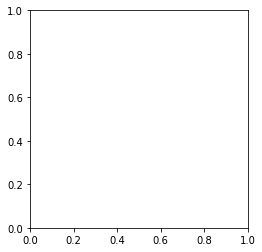

In [19]:
# develop a classifier for the Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

# load faces
data = load('face_recognition_project.npz')
testX_faces = data['arr_2']

# load face embeddings
data = load('face_recognition_project.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Flatten the images
trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1)) 

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# test model on a random example from the test dataset
# 테스트 세트에서 임의의 예를 선택한 다음 임베딩, 얼굴 픽셀, 예상 클래스 예측 및 해당 클래스 이름을 가져옴
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face 클래스 정수와 예측 확률
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name 예측된 클래스 정수의 이름과 이 예측의 확률을 얻을 수 있다.
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun 예측된 이름 및 확률과 함께 얼굴 픽셀을 그린다.
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [20]:
# 적합 모델을 사용하여 학습 및 테스트 데이터 세트의 각 예에 대한 예측을 수행한 다음 분류 정확도를 계산
from sklearn.metrics import accuracy_score
# predict 
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


In [1]:
# 적합 모델을 사용하여 학습 및 테스트 데이터 세트의 각 예에 대한 예측을 수행한 다음 분류 정확도를 계산
from sklearn.metrics import accuracy_score
# predict 
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=93.325, test=91.746
